# 🔄 Merged Dataset — Minimal EDA & Preprocessing

This notebook performs a focused quality pass on the merged dataset:
- Quantify and treat missing values with targeted strategies.
- Detect and mitigate outliers using a single, consistent method.
- Apply minimal encoding/scaling and persist a clean artifact for modeling.

Non‑essential analyses (Q–Q plots, correlation matrices, excessive visuals) are intentionally excluded to keep the pipeline lean and reproducible.


# Merging Data

In [1]:
from scripts.dataMerging.combineDatasets import extract_features_elevation , extract_features_landcover , extract_features_monthly_clim , extract_features_soil , organize_monthly_climat_files
from scripts.tools.merge_data_sources import merge_data_sources


## ☁️ Climat Dataset ☁️



In [2]:

# Organize the files
monthly_tmax_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/max/*.tif"
)
monthly_tmin_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/min/*.tif"
)
monthly_tprec_data = organize_monthly_climat_files(
    "../data/climate_dataset/5min/prec/*.tif"
)


fires_tmax = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tmax_data,
    output_path="../data/features/fire_tmax.csv",
    value_name="tmax",
)


fires_tmin = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tmin_data,
    output_path="../data/features/fire_tmin.csv",
    value_name="tmin",
)


fires_tprec = extract_features_monthly_clim(
    fire_csv="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_dict=monthly_tprec_data,
    output_path="../data/features/fire_tprec.csv",
    value_name="tprec",
)

✅ Extracted tmax for month 01 (6355 points)
✅ Extracted tmax for month 02 (5469 points)
✅ Extracted tmax for month 03 (8783 points)
✅ Extracted tmax for month 04 (6687 points)
✅ Extracted tmax for month 05 (7623 points)
✅ Extracted tmax for month 06 (7030 points)
✅ Extracted tmax for month 07 (8664 points)
✅ Extracted tmax for month 08 (8973 points)
✅ Extracted tmax for month 09 (7051 points)
✅ Extracted tmax for month 10 (8619 points)
✅ Extracted tmax for month 11 (8211 points)
✅ Extracted tmax for month 12 (6785 points)
💾 Saved to ../data/features/fire_tmax.csv
✅ Extracted tmin for month 01 (6355 points)
✅ Extracted tmin for month 02 (5469 points)
✅ Extracted tmin for month 03 (8783 points)
✅ Extracted tmin for month 04 (6687 points)
✅ Extracted tmin for month 05 (7623 points)
✅ Extracted tmin for month 06 (7030 points)
✅ Extracted tmin for month 07 (8664 points)
✅ Extracted tmin for month 08 (8973 points)
✅ Extracted tmin for month 09 (7051 points)
✅ Extracted tmin for month 10 (861

## 🟩 Landcover 🟩

In [3]:

fires_with_landcover = extract_features_landcover(
    csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    shapefile_path="../data/land_dataset/combined/alg_tun_landcvr.shx",
    lat_col="latitude",
    lon_col="longitude",
    keep_cols=["GRIDCODE"],  # can be ["GRIDCODE", "CLASS", "AREA", ...]
    output_path="../data/features/fire_landcover.csv",
)


## 🌱 Soil 🌱

In [4]:
_ , fires_with_soil = extract_features_soil(
    csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    raster_path="../data/soil_dataset/original/HWSD2_RASTER/HWSD2.bil",
    soil_attributes_csv="../data/soil_dataset/simplified/D1_soil_features_alg_tun.csv",
    output_soil_ids="../data/features/fire_soil_ids.csv",
    output_soil_feature="../data/features/fire_soil.csv",
)

## 🏔️ Elevation 🏔️

In [5]:
fires_with_elevation = extract_features_elevation(
    raster_path="../data/elevation_dataset/simplified/elevation_clipped.tif",
    fire_csv_path="../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv",
    output_csv="../data/features/fire_elevation.csv",
    value_name="elevation",
)


Loaded 90250 points from ../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv


Extracting elevation: 100%|██████████| 90250/90250 [00:22<00:00, 4043.51it/s]


✅ Saved extracted elevation to ../data/features/fire_elevation.csv


📊 Analyse du DataFrame :

🔹 acq_date: 364 valeurs distinctes (0.40%)
🔹 acq_time: 348 valeurs distinctes (0.39%)
🔹 satellite: 1 valeurs distinctes (0.00%)


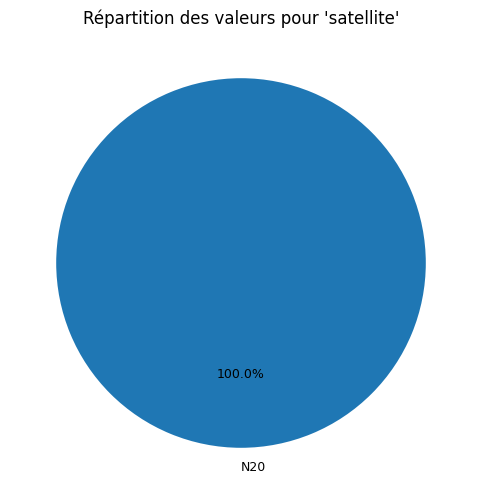

🔹 instrument: 1 valeurs distinctes (0.00%)


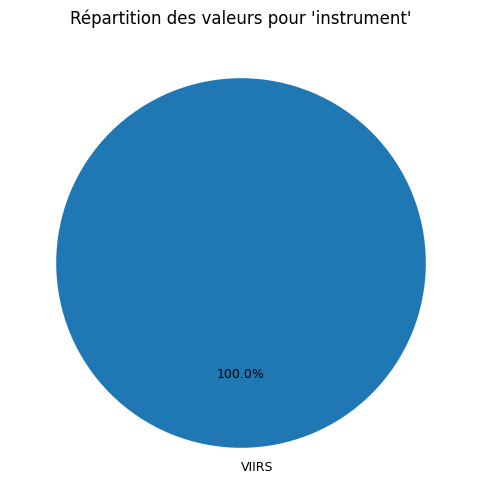

🔹 confidence: 3 valeurs distinctes (0.00%)


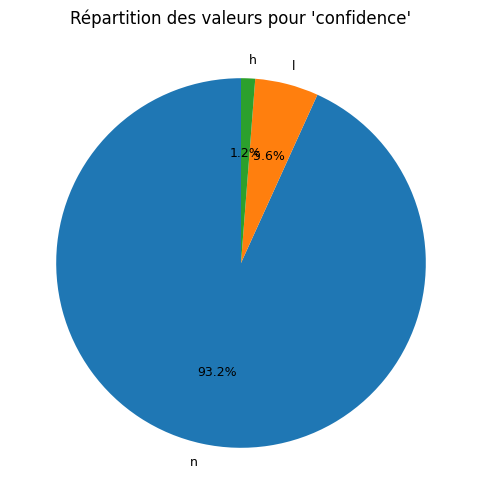

🔹 version: 1 valeurs distinctes (0.00%)


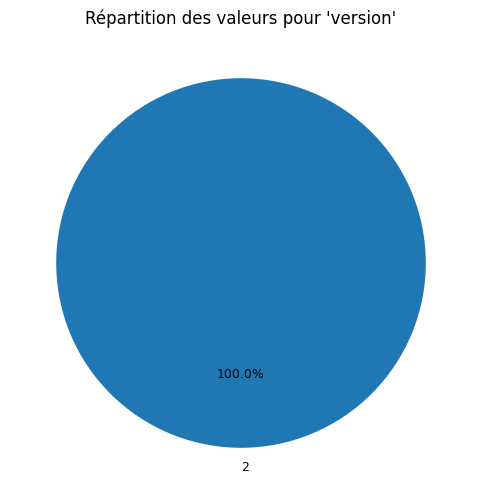

🔹 daynight: 2 valeurs distinctes (0.00%)


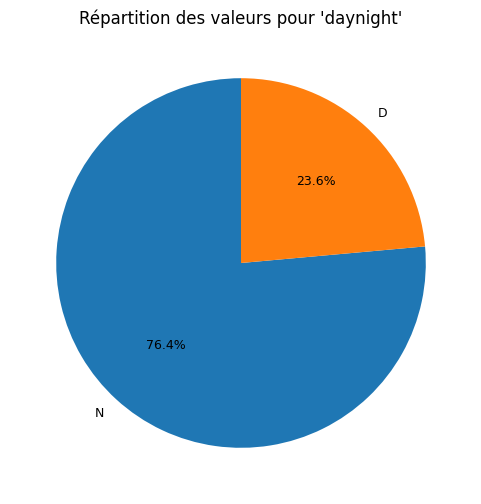

🔹 type: 3 valeurs distinctes (0.00%)


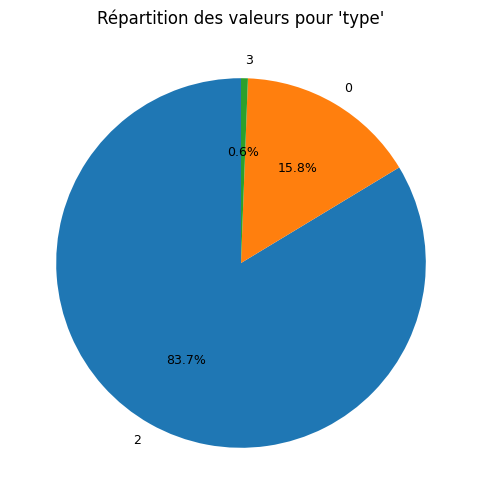

📊 Analyse du DataFrame :

🔹 HWSD2_SMU_ID: 214 valeurs distinctes (0.13%)
🔹 COARSE: 27 valeurs distinctes (0.02%)
🔹 SAND: 45 valeurs distinctes (0.03%)
🔹 SILT: 34 valeurs distinctes (0.02%)
🔹 CLAY: 33 valeurs distinctes (0.02%)
🔹 TEXTURE_SOTER: 4 valeurs distinctes (0.00%)


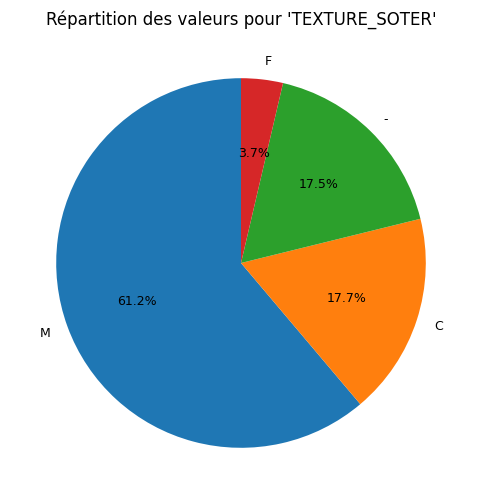

🔹 CEC_SOIL: 32 valeurs distinctes (0.02%)
🔹 CEC_CLAY: 44 valeurs distinctes (0.03%)
🔹 BSAT: 33 valeurs distinctes (0.02%)
🔹 ALUM_SAT: 16 valeurs distinctes (0.01%)
🔹 ESP: 21 valeurs distinctes (0.01%)
🔹 ELEC_COND: 10 valeurs distinctes (0.01%)


In [6]:

from scripts.featureEngneering.checkColomnsVariety import analyze_categorical_columns
import pandas as pd 

df_fire = pd.read_csv("../data/fire_dataset/viirs-jpss1_2024_alg_Tun.csv")
analyze_categorical_columns(df_fire, pie_threshold=5, save_fig=False)
analyze_categorical_columns(fires_with_soil, pie_threshold=5, save_fig=False)


In [7]:
df_fire  = df_fire.drop(columns=["version","instrument","satellite"])

## 🔥 Merging with Fire Data 🔥

In [8]:
sources = [df_fire,"../data/features/fire_tmin.csv" , "../data/features/fire_tmax.csv" , "../data/features/fire_tprec.csv"]
temp_df = merge_data_sources(sources , ["latitude","longitude","acq_date"], "inner")

csv_list= [temp_df,  "../data/features/fire_landcover.csv" , "../data/features/fire_elevation.csv" , "../data/features/fire_soil.csv"]
temp_df = merge_data_sources(
    csv_list,
    on=["latitude", "longitude"],
    how="inner",
    output_path="../data/Merged/merged.csv"
)


Merged CSV saved to: ../data/Merged/merged.csv


## 1) Imports and Data Loading

Load required libraries and the merged dataset.


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from eda_scripts.eda_utils import (
    check_missing_values, plot_missing_values,
    plot_boxplot
)

merged = pd.read_csv("../data/Merged/merged.csv")
print("Loaded merged:", merged.shape)


Loaded merged: (161881, 40)


## 2) Minimal Overview

A short check to confirm structure without full descriptive analysis.


In [10]:
print(merged.dtypes)
display(merged.head(3))


latitude         float64
longitude        float64
bright_ti4       float64
scan             float64
track            float64
acq_date          object
acq_time           int64
confidence        object
bright_ti5       float64
frp              float64
daynight          object
type               int64
tmin             float64
tmax             float64
tprec            float64
GRIDCODE         float64
elevation          int64
HWSD2_SMU_ID       int64
COARSE             int64
SAND               int64
SILT               int64
CLAY               int64
TEXTURE_USDA     float64
TEXTURE_SOTER     object
BULK             float64
REF_BULK         float64
ORG_CARBON       float64
PH_WATER         float64
TOTAL_N          float64
CN_RATIO         float64
CEC_SOIL           int64
CEC_CLAY           int64
CEC_EFF          float64
TEB              float64
BSAT               int64
ALUM_SAT           int64
ESP                int64
TCARBON_EQ       float64
GYPSUM           float64
ELEC_COND          int64


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,...,CEC_SOIL,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,n,277.66,1.24,...,-4,-4,-4.0,-4.0,-4,-4,-4,-4.0,-4.0,-4
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,n,277.05,1.57,...,13,74,30.0,30.0,100,0,3,8.0,4.0,1
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,n,277.04,1.34,...,13,74,30.0,30.0,100,0,3,8.0,4.0,1


## 3) Missing Values — Measurement

Quantify missingness to inform imputation strategies. We focus only on variables with non‑zero missing rates.


REF_BULK        17.547458
TEXTURE_USDA    17.547458
tmax             0.163700
tmin             0.163700
tprec            0.163700
GRIDCODE         0.158141
dtype: float64

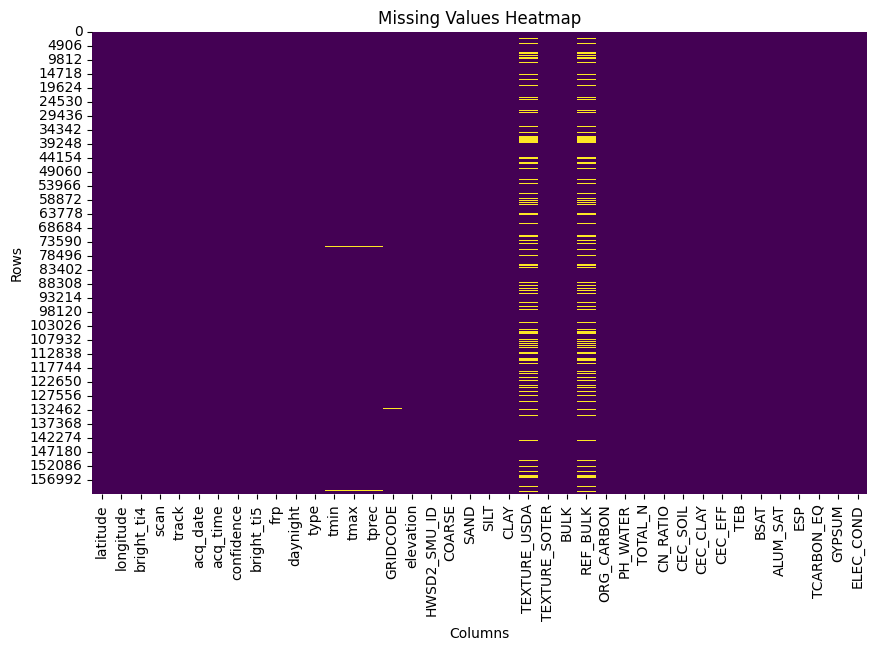

In [11]:
mv = (merged.isnull().mean()*100).sort_values(ascending=False)
display(mv[mv>0])
plot_missing_values(merged)


## 🧼 Missing Values — Hybrid Policy (Stat + RF + KNN)

Tiered rules per column:
- ≤ 5% missing: fast statistical imputation (median for numeric, mode for categorical).
- 5–30% missing: ML imputation using the provided utilities:
  - Categorical: Random‑Forest classifier imputation.
  - Numeric: KNN imputer on selected numeric columns.
- > 30% missing: drop, unless business‑critical (then escalate to ML imputation).

This balances robustness, speed, and explainability.


In [12]:
import numpy as np
import pandas as pd

from scripts.dataCleaning import impute_categorical_rf, impute_numeric_knn  # adjust path if needed

df = merged.copy()

# --- USER OVERRIDES -------------------------------------------------
CATEGORICAL_COLS = ["TEXTURE_USDA"]  # user-defined categorical columns
NUMERIC_COLS = ["REF_BULK","tmax","tmin","tprec"]                    # if you want to force numeric treatment for some
BUSINESS_CRITICAL = set(["TEXTURE_USDA", "GRIDCODE"])
# -------------------------------------------------------------------

def is_numeric(s, name):
    """Return True if column should be treated as numeric."""
    if name in CATEGORICAL_COLS:
        return False
    if name in NUMERIC_COLS:
        return True
    return pd.api.types.is_numeric_dtype(s)

# --- REPORT INITIAL MISSINGNESS ------------------------------------
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
display(missing_pct[missing_pct > 0])

# --- 1) Tiny gaps (≤5%): median/mode -------------------------------
for col, pct in missing_pct.items():
    if pct == 0 or pct > 5:
        continue
    if is_numeric(df[col], col):
        df[col] = df[col].fillna(df[col].median())
        print(f"🟢 {col}: median imputation (≤5%)")
    else:
        mode_val = df[col].mode(dropna=True)
        mode_val = mode_val.iat[0] if not mode_val.empty else "Unknown"
        df[col] = df[col].fillna(mode_val)
        print(f"🟢 {col}: mode imputation (≤5%) -> {mode_val}")

# --- 2) Moderate gaps (5–30%): ML imputers --------------------------
for col, pct in missing_pct.items():
    if pct <= 5 or pct > 30:
        continue
    if is_numeric(df[col], col):
        num_subset = [c for c in df.select_dtypes(include=np.number).columns if c != col]
        num_subset = [col] + num_subset
        print(f"🟠 {col}: KNN imputation (5–30%) on {len(num_subset)} numeric cols")
        df[num_subset] = impute_numeric_knn(df[num_subset], num_cols=num_subset, n_neighbors=5)
    else:
        print(f"🟠 {col}: RF categorical imputation (5–30%)")
        df = impute_categorical_rf(df, col)

# --- 3) Large gaps (>30%): drop or handle critical -----------------
for col, pct in missing_pct.items():
    if pct <= 30:
        continue
    if col in BUSINESS_CRITICAL:
        if is_numeric(df[col], col):
            print(f"🟣 {col}: >30% but critical → KNN imputation")
            df[[col]] = impute_numeric_knn(df[[col]], num_cols=[col], n_neighbors=5)
        else:
            print(f"🟣 {col}: >30% but critical → RF categorical imputation")
            df = impute_categorical_rf(df, col)
    else:
        print(f"🔴 {col}: >30% missing → dropped")
        df.drop(columns=[col], inplace=True)

# --- REPORT REMAINING MISSINGNESS ---------------------------------
print("\n✅ Remaining missing %:")
rem = (df.isnull().mean() * 100).sort_values(ascending=False)
display(rem[rem > 0] if (rem > 0).any() else "None")


REF_BULK        17.547458
TEXTURE_USDA    17.547458
tmax             0.163700
tmin             0.163700
tprec            0.163700
GRIDCODE         0.158141
dtype: float64

🟢 tmax: median imputation (≤5%)
🟢 tmin: median imputation (≤5%)
🟢 tprec: median imputation (≤5%)
🟢 GRIDCODE: median imputation (≤5%)
🟠 REF_BULK: KNN imputation (5–30%) on 36 numeric cols
🟠 TEXTURE_USDA: RF categorical imputation (5–30%)

✅ Remaining missing %:


'None'

## 5) Outliers — Single Method (IQR)

We use IQR globally (factor=1.5). It is robust on skewed environmental variables.  
We will mitigate outliers by capping (winsorization) to IQR bounds, which preserves rows and limits influence.



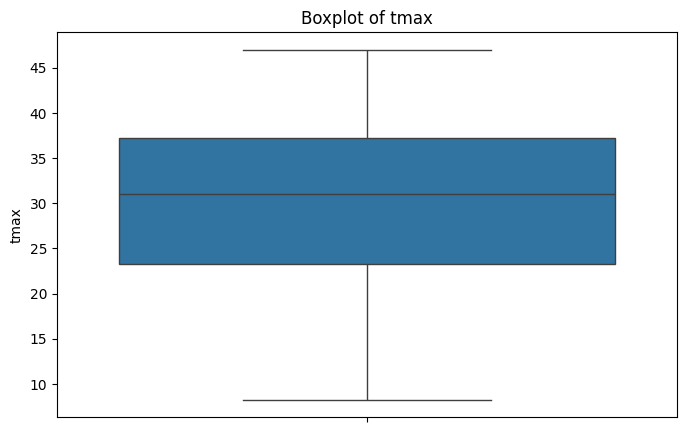

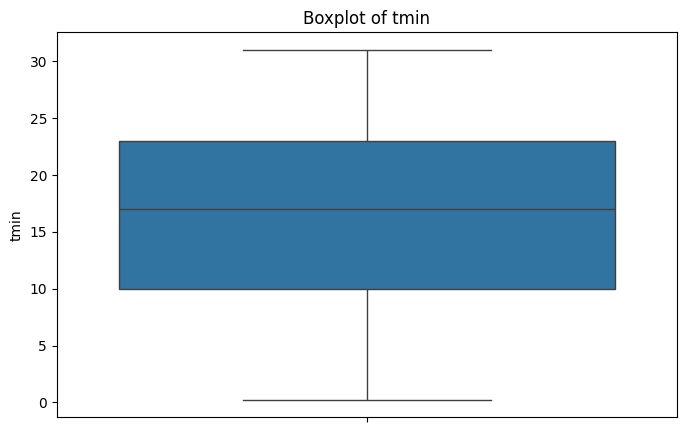

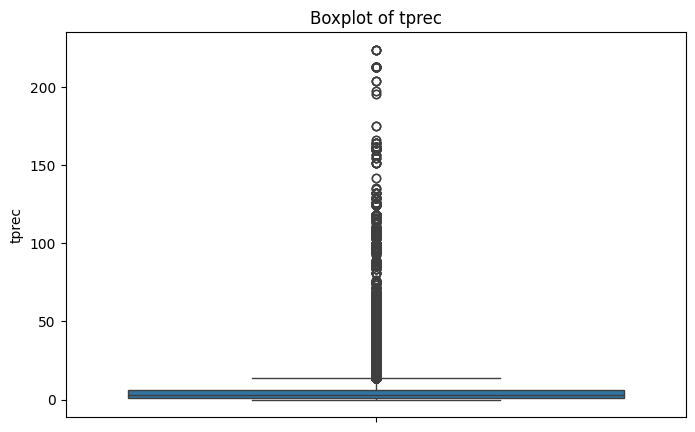

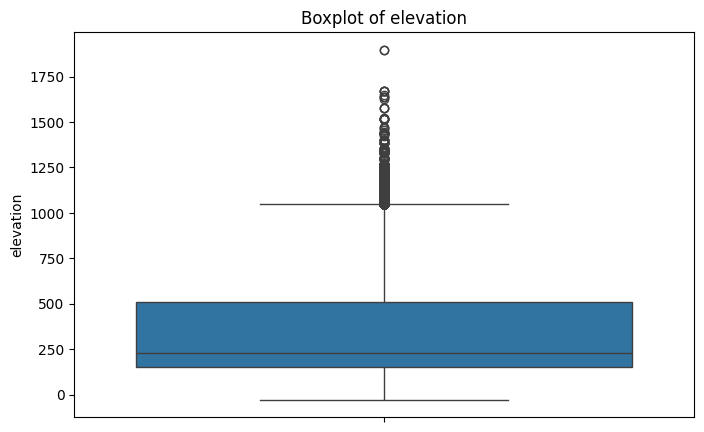

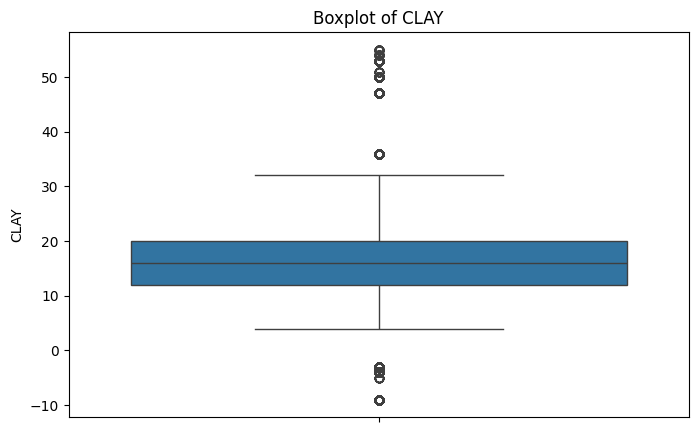

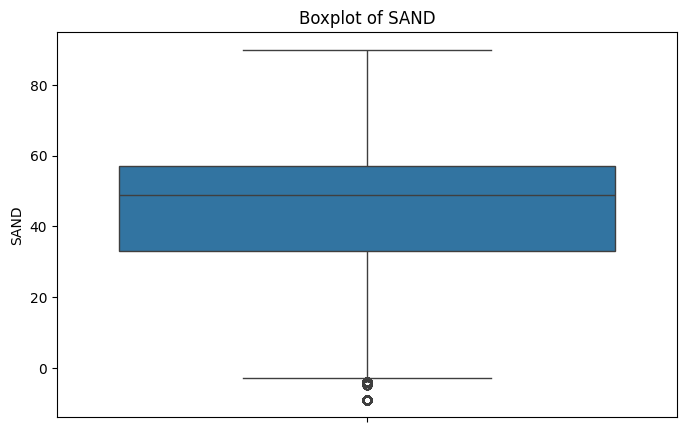

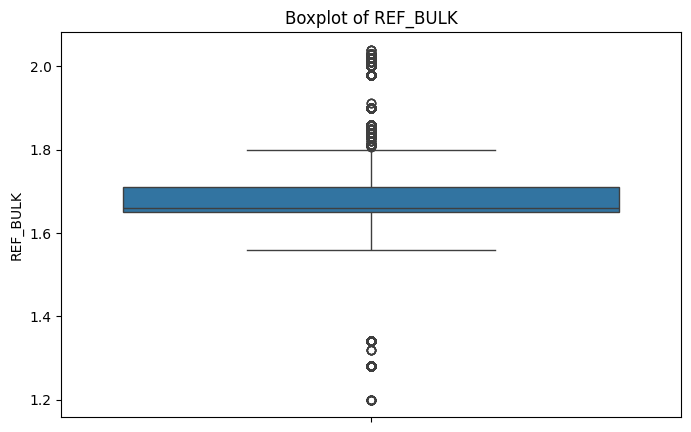

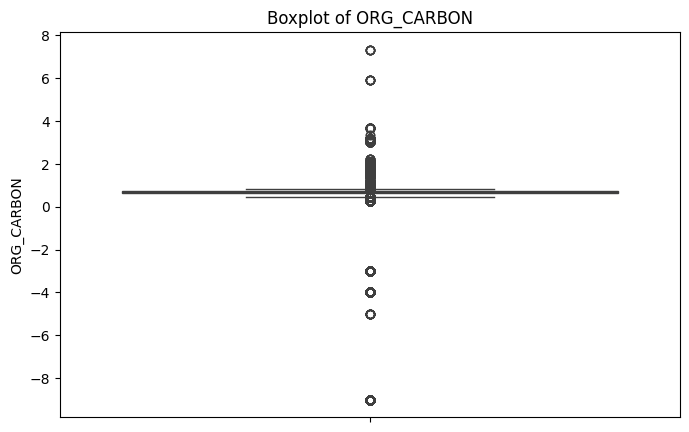

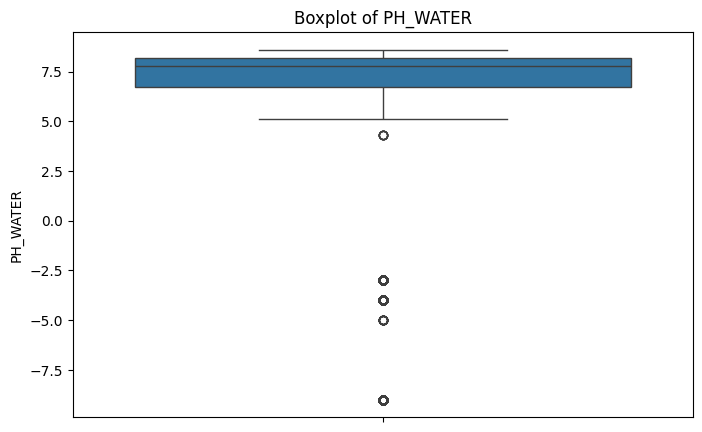

In [13]:


# Choose a concise, high-impact subset
inspect_cols = [c for c in ["tmax","tmin","tprec","elevation","CLAY","SAND","REF_BULK","ORG_CARBON","PH_WATER"] if c in df.columns]

for col in inspect_cols:
    plot_boxplot(df, col)


In [14]:
METHOD = "IQR"   
IQR_FACTOR = 1.5
Z_THRESH = 3.0

numeric_cols = df.select_dtypes(include='number').columns.tolist()

def cap_iqr(s, factor=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - factor*iqr, q3 + factor*iqr
    return s.clip(lower, upper)

def cap_zscore(s, z=3.0):
    mu, sd = s.mean(), s.std(ddof=0)
    if sd == 0 or pd.isna(sd):
        return s
    lower, upper = mu - z*sd, mu + z*sd
    return s.clip(lower, upper)

df_capped = df.copy()
for c in numeric_cols:
    if METHOD == "Z":
        df_capped[c] = cap_zscore(df_capped[c], z=Z_THRESH)
    else:
        df_capped[c] = cap_iqr(df_capped[c], factor=IQR_FACTOR)


## 6) Outliers — Single Visual (Boxplot)

Use only boxplots to visually confirm capped distributions on a few key variables.


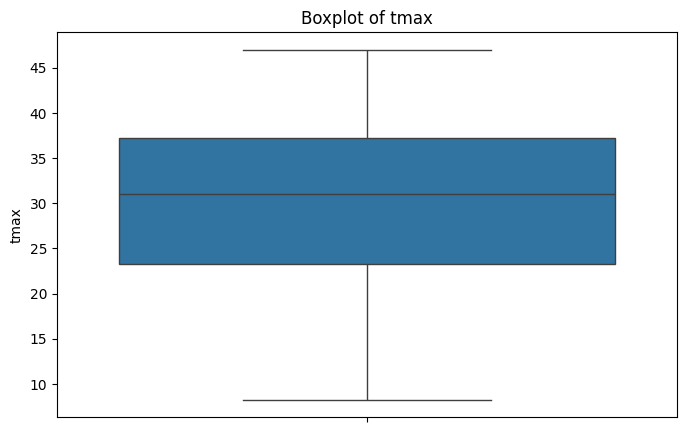

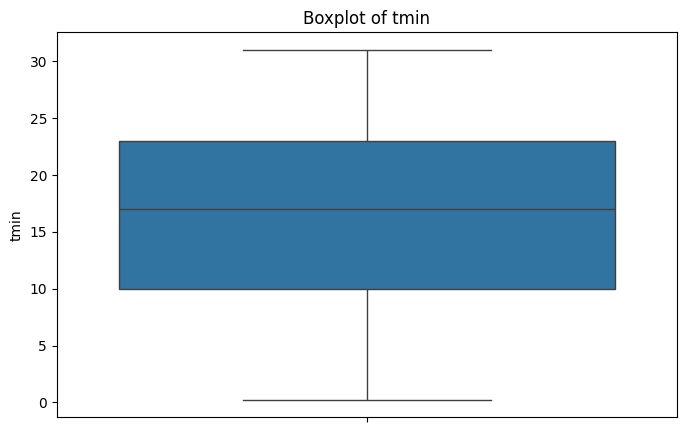

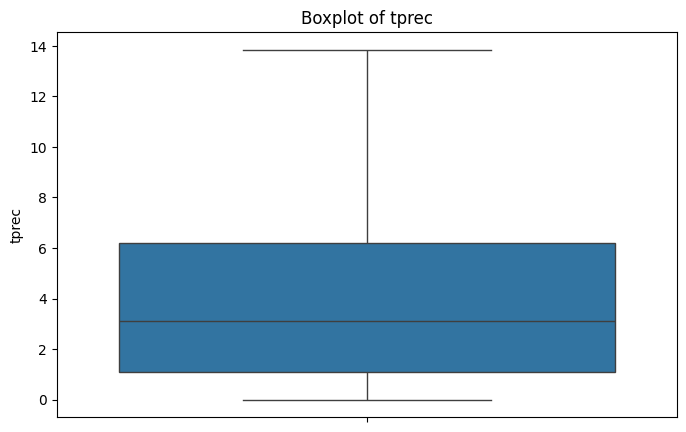

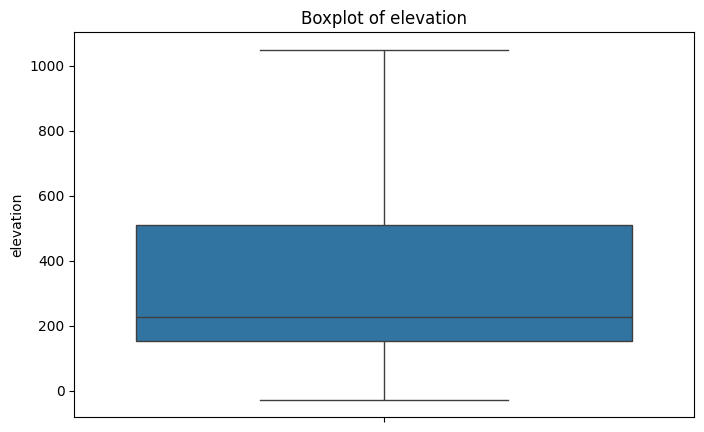

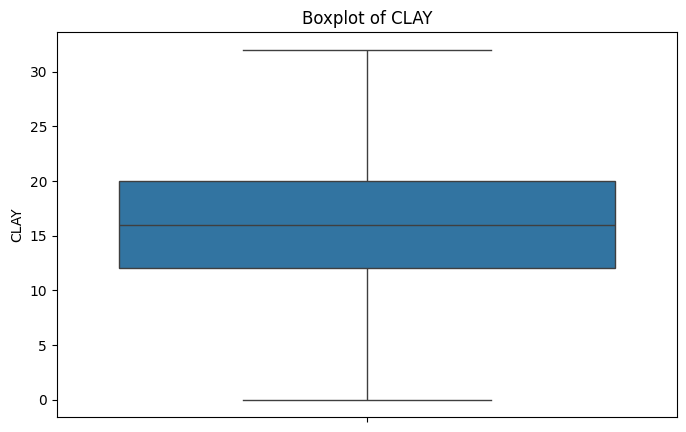

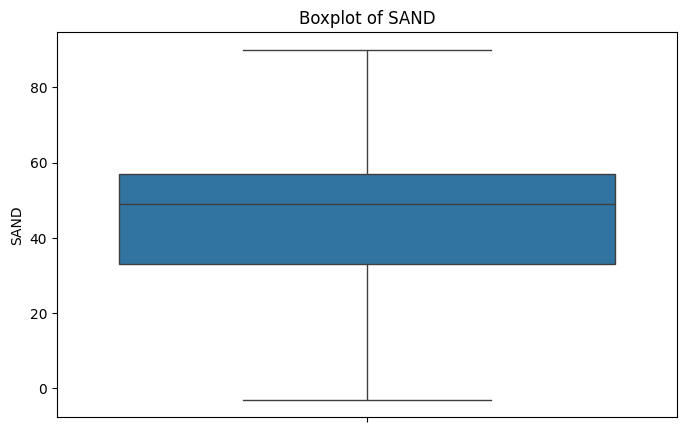

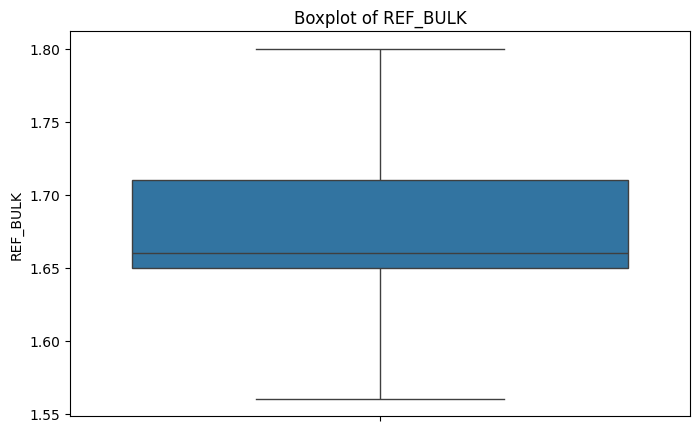

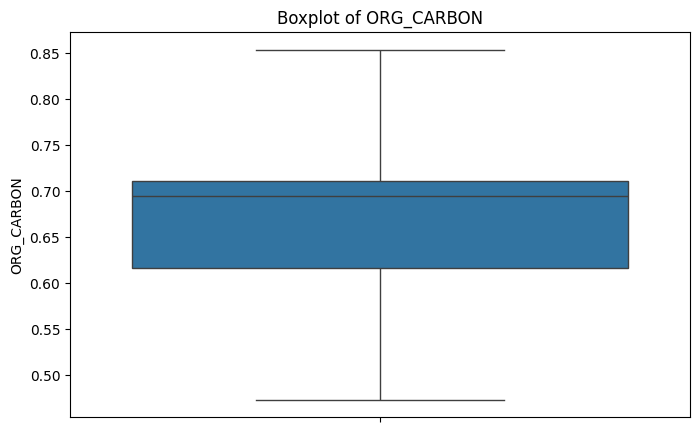

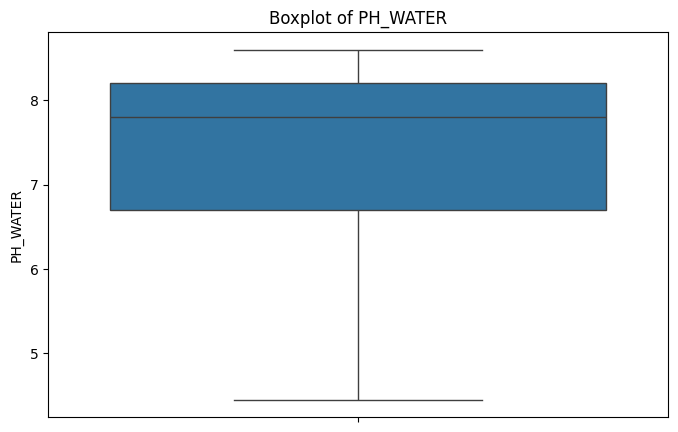

In [15]:
for c in ["tmax","tmin","tprec","elevation","CLAY","SAND","REF_BULK","ORG_CARBON","PH_WATER"]:
    if c in df_capped.columns:
        plot_boxplot(df_capped, c)


## 7) Minimal Encoding & Optional Scaling

This step prepares features for modeling with the least complexity required.

- One‑hot encode only the main categorical variables: `TEXTURE_USDA`, `TEXTURE_SOTER`, `GRIDCODE`, `daynight`.  
  - We use `drop_first=True` to avoid redundant dummy columns and reduce multicollinearity in linear models.  
  - Result: a numeric feature matrix where categories become binary indicators.

- Optionally standardize numeric features (z‑score) with `StandardScaler`.  
  - Centers each numeric column to mean 0 and scales to unit variance.  
  - Helpful for algorithms sensitive to feature scales (logistic/linear regression, SVM, k‑NN, neural nets).  
  - Optional for tree‑based models (random forests, gradient boosting), which are scale‑invariant.

When to use:
- If your next step is tree‑based only, you can skip scaling.  
- If you mix linear/SVM/k‑NN with trees, keep scaling for stability and comparability.

Optional quick plots:
- After encoding, you may inspect class balance of key categories before they are expanded into dummies:
  - Bar charts for `TEXTURE_USDA`, `TEXTURE_SOTER`, `GRIDCODE`, `daynight`.
  - This is informational only and not required for preprocessing.

Outcome:
- A clean numeric table suitable for most ML models, with minimal feature explosion and stable optimization behavior.


In [16]:
encode_cols = [c for c in ["TEXTURE_USDA","TEXTURE_SOTER","GRIDCODE","daynight"] if c in df_capped.columns]
df_enc = pd.get_dummies(df_capped, columns=encode_cols, drop_first=True)

num_cols_present = df_enc.select_dtypes(include=np.number).columns.tolist()
if num_cols_present:
    scaler = StandardScaler()
    df_enc[num_cols_present] = scaler.fit_transform(df_enc[num_cols_present])


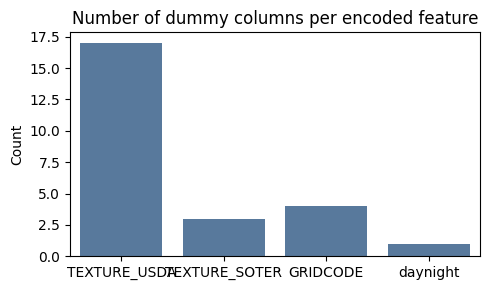

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show how many dummy columns were created for each encoded feature
created = {}
for col in ["TEXTURE_USDA","TEXTURE_SOTER","GRIDCODE","daynight"]:
    if col in df_capped.columns:
        prefix = f"{col}_"
        created[col] = sum(c.startswith(prefix) for c in df_enc.columns)
        
plt.figure(figsize=(5,3))
sns.barplot(x=list(created.keys()), y=list(created.values()), color="#4c78a8")
plt.title("Number of dummy columns per encoded feature")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 8) Save Clean Artifact & Sanity Checks

Persist a minimal, clean artifact and ensure there are no residual NaNs or non‑finite values.


In [18]:
df_enc.to_csv("../data/Merged/merged_clean_minimal.csv", index=False)
print("✅ Saved ../data/Merged/merged_clean_minimal.csv", df_enc.shape)

# Sanity
chk_cols = [c for c in ["TEXTURE_USDA","REF_BULK","tmax","tmin","tprec","GRIDCODE"] if c in df_enc.columns]
if chk_cols:
    print("Missing counts (key cols):")
    print(df_enc[chk_cols].isnull().sum())

num_cols_final = df_enc.select_dtypes(include=np.number).columns
bad = [c for c in num_cols_final if not np.isfinite(df_enc[c]).all()]
print("Non‑finite numeric columns:", bad if bad else "None")


✅ Saved ../data/Merged/merged_clean_minimal.csv (161881, 61)
Missing counts (key cols):
REF_BULK    0
tmax        0
tmin        0
tprec       0
dtype: int64
Non‑finite numeric columns: None


In [19]:
print("Clean merged shape:", df_enc.shape)


Clean merged shape: (161881, 61)


## ✅ Summary

- Missing values handled with precise, variable‑specific rules (Unknown for categories; groupwise median for REF_BULK; simple medians for tiny climate gaps).  
- Outliers treated consistently using IQR capping across numerics; single visual (boxplot) verified distributions.  
- Minimal encoding and optional scaling applied; clean artifact saved for modeling.

This notebook intentionally avoids heavy analysis (correlations, Q–Q plots, multiple overlapping visuals) to keep the preprocessing pipeline concise, auditable, and ready for downstream tasks.
